In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("aptos_csv2.csv")

<AxesSubplot:xlabel='preço', ylabel='crawler'>

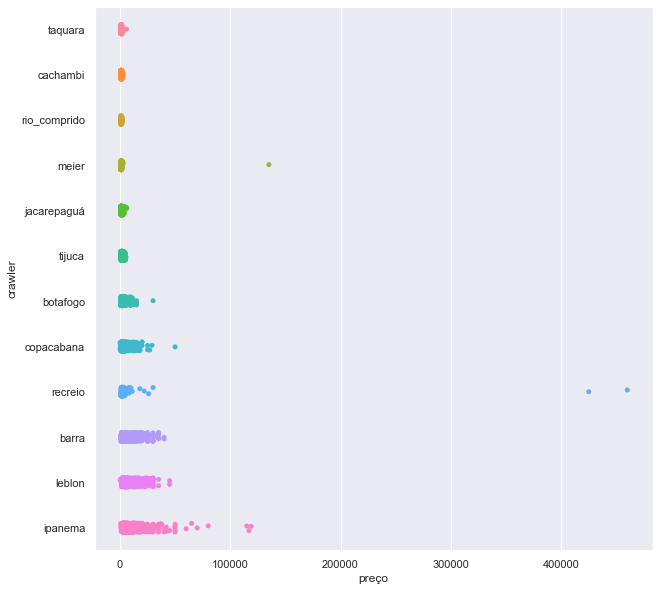

In [3]:
order = df[["crawler", "preço"]].groupby("crawler").mean().sort_values(by="preço").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="preço" , y="crawler", order=order)

In [4]:
def iqr(df):
    q1,q3 = df.quantile([.25 , .75])
    iqr= q3-q1
    lower_bound= q1 - 1.5*iqr
    upper_bound= q3 + 1.5*iqr
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(df)
    return lower_bound , upper_bound, round(pct_outliers,2)

def percentiles(df, percentiles_levels=0.1):
    lower_bound, upper_bound = df.quantile([percentile_level, 1-percentile_level])
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(df)
    return lower_bound, upper_bound, round(pct_outliers,2)

In [5]:
coluna = "preço"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>0.35:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
        print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
        df.loc[(df["crawler"]==bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan

<AxesSubplot:xlabel='preço', ylabel='crawler'>

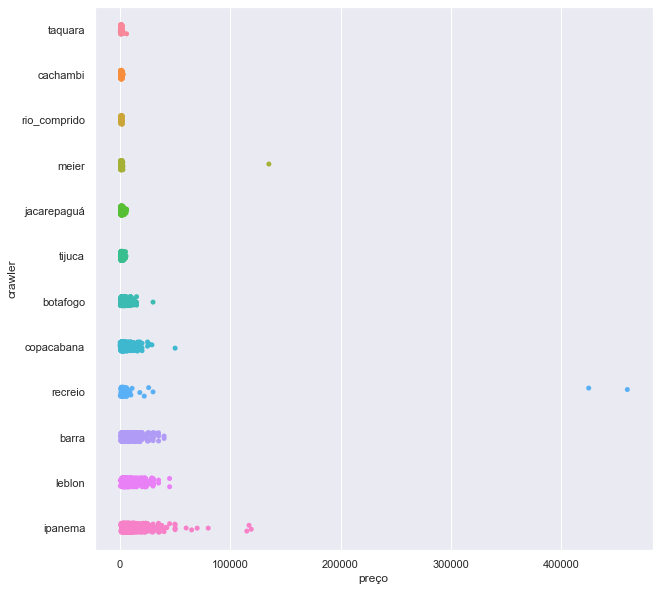

In [6]:
order = df[["crawler", "preço"]].groupby("crawler").mean().sort_values(by="preço").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, 
              x="preço", y="crawler", 
              order=order)